# BANK CUSTOMER CHURN PREDICTION

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


### Exploratory Data Analysis

In [3]:
df.shape

(10002, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
df.drop_duplicates(inplace=True)
df.shape

(10000, 14)

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(9996, 14)

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [12]:
numerical_cols = ['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']
for col in numerical_cols:
    print(col ,df[col].unique())

CreditScore [619 608 502 699 645 376 528 497 476 549 635 616 653 587 726 732 636 510
 669 846 577 756 571 574 411 591 533 553 520 722 475 490 804 850 582 472
 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725 511 614 742
 687 555 684 603 751 581 735 661 675 738 813 657 604 519 664 678 757 416
 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773 814 710
 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625 432 770
 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535 716 539
 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778 514 525
 715 580 807 501 521 759 516 711 618 643 671 689 620 676 572 695 592 567
 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771 681
 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799 602
 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644 626
 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593 801
 611 802 745 483 690 492 709 705 560 75

### Analyzing the Numerical Features

<Axes: xlabel='CreditScore', ylabel='Count'>

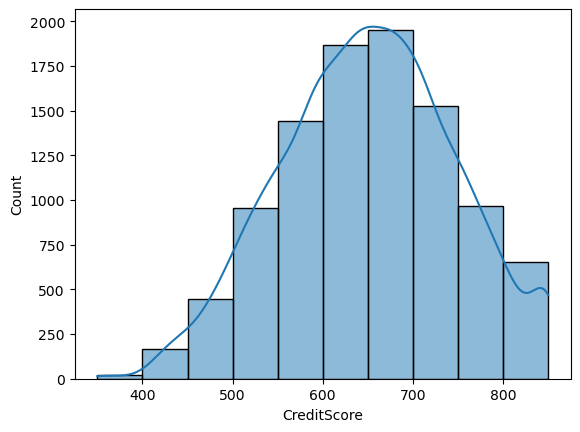

In [13]:
sns.histplot(df["CreditScore"],bins=10,kde=True)

<Axes: xlabel='Age', ylabel='Count'>

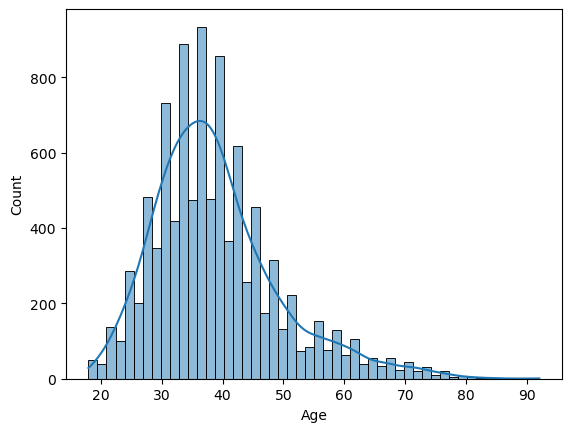

In [14]:
sns.histplot(df["Age"],kde=True, bins=50)

<Axes: xlabel='Balance', ylabel='Count'>

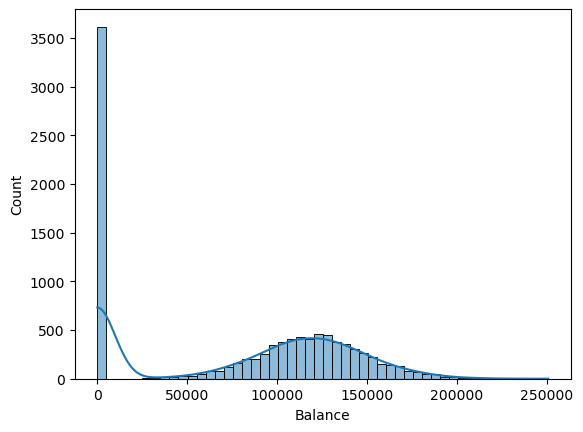

In [15]:
sns.histplot(df["Balance"],kde=True,bins=50)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

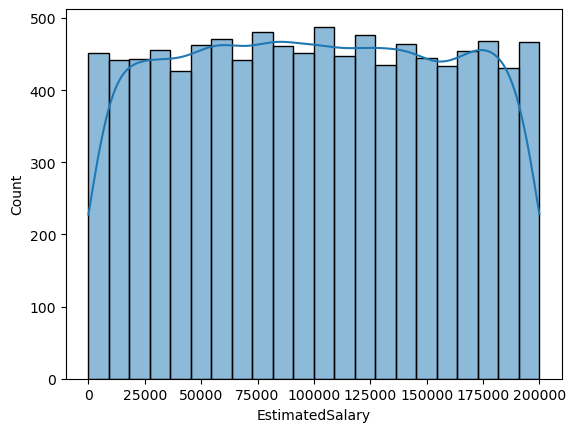

In [16]:
sns.histplot(df["EstimatedSalary"],kde=True)

In [17]:
df["Exited"].value_counts()

Exited
0    7959
1    2037
Name: count, dtype: int64

### Analyzing the Categorical Features

<Axes: xlabel='Geography', ylabel='count'>

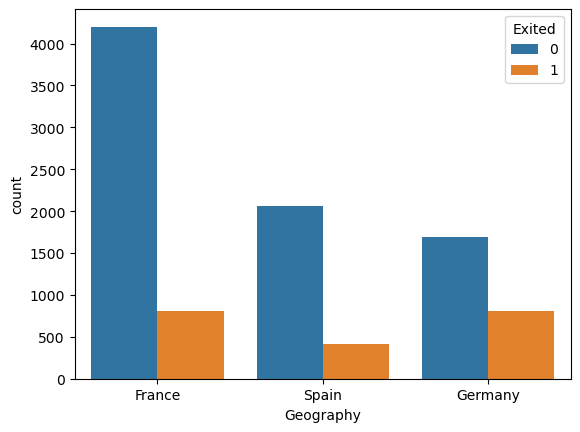

In [18]:
sns.countplot(data=df , x = "Geography", hue="Exited")

<Axes: xlabel='Gender', ylabel='count'>

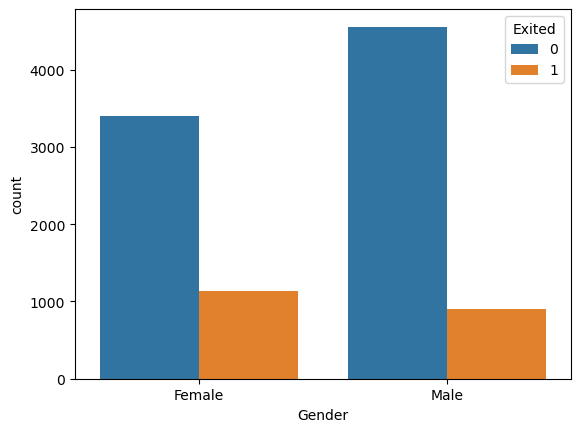

In [19]:
sns.countplot(x= df["Gender"], hue=df["Exited"])

<Axes: >

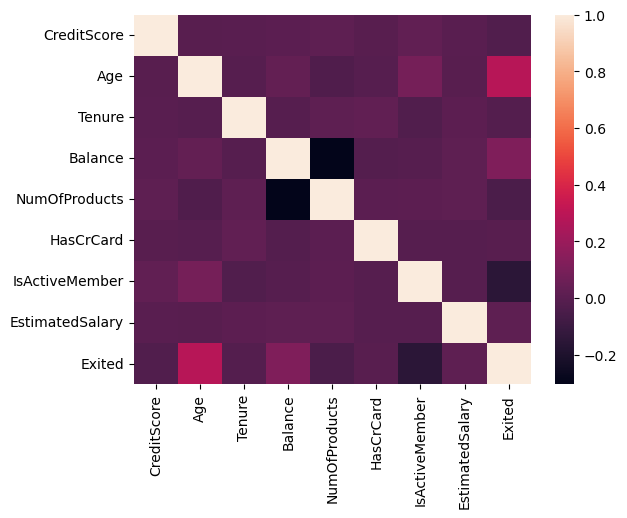

In [26]:
sns.heatmap(df.corr(numeric_only=True))

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


### LabelEncoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Geography"] = le.fit_transform(df["Geography"])
df["Gender"] = le.fit_transform(df["Gender"])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,2,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1


### Handling Imbalanced Data

In [29]:
# Spliting the Data into Input and Target Features
X = df.drop('Exited', axis=1)
y = df['Exited']

from imblearn.over_sampling import SMOTE
# Using Smote to Handle the Imbalanced Data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
y_resampled.value_counts()

Exited
1    7959
0    7959
Name: count, dtype: int64

### Train Test Split and Scaling Data

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

# Scale features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Building a Artificial Neural Network

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)), 
    layers.Dense(5, activation='relu'),
    layers.Dense(1, activation='sigmoid')                                 
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100


C:\Users\Prasad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5997 - loss: 0.6710 - val_accuracy: 0.6831 - val_loss: 0.6432
Epoch 2/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7060 - loss: 0.6113 - val_accuracy: 0.7525 - val_loss: 0.5521
Epoch 3/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7277 - loss: 0.5531 - val_accuracy: 0.7600 - val_loss: 0.5163
Epoch 4/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7418 - loss: 0.5319 - val_accuracy: 0.7642 - val_loss: 0.5035
Epoch 5/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7518 - loss: 0.5186 - val_accuracy: 0.7717 - val_loss: 0.4974
Epoch 6/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7580 - loss: 0.5105 - val_accuracy: 0.7778 - val_loss: 0.4850
Epoch 7/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7586 - loss: 0.5043 - val_accuracy: 0.7759 - val_loss: 0.4793
Epoch 8/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7638 - loss: 0.4989 - val_accuracy: 0.7773

### Evaluating the Model

In [32]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8407


In [33]:
# For binary classification, output will be probability (0 to 1)
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32")

print("Predicted probabilities:", y_pred[:5])
print("Predicted classes:", y_pred_class[:5])


165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Predicted probabilities: [[0.3167254 ]
 [0.6061578 ]
 [0.58320534]
 [0.18519269]
 [0.01370917]]
Predicted classes: [[0]
 [1]
 [1]
 [0]
 [0]]


### Reports of the Neural Network

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.80      0.85      3078
           1       0.76      0.90      0.82      2175

    accuracy                           0.84      5253
   macro avg       0.84      0.85      0.84      5253
weighted avg       0.85      0.84      0.84      5253



<Axes: >

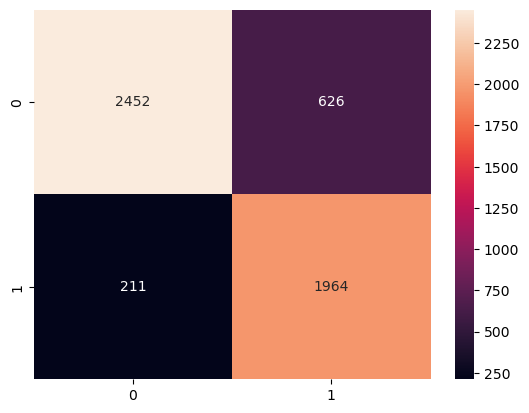

In [34]:
from sklearn.metrics import  classification_report,confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred_class,y_test)
cr = classification_report(y_pred_class,y_test)
print("Classification Report\n", cr)
sns.heatmap(cm, annot=True,fmt="d")


### DONE